In [38]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
from utils.discrete import *
import ot

/tmp/ipykernel_10128/2678013854.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_10128/2678013854.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


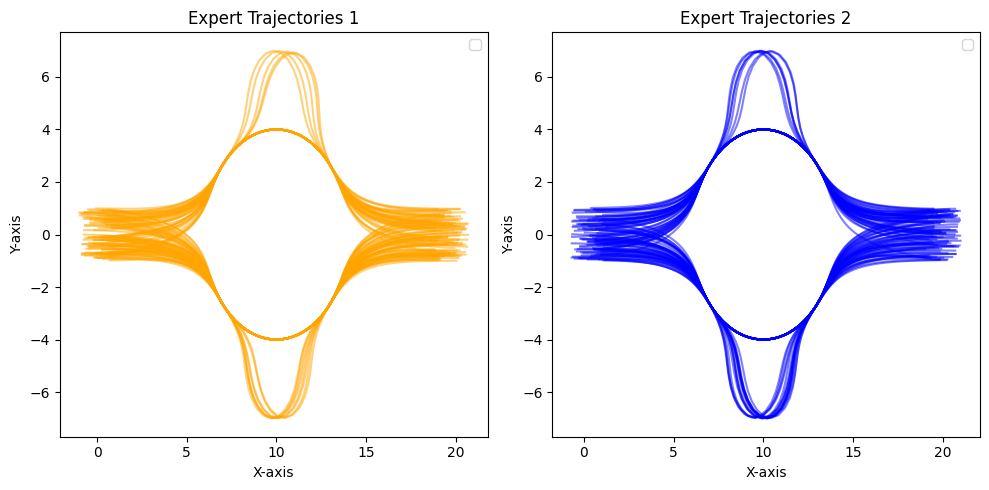

In [51]:
# Loading training trajectories
all_points1 = []    # want modes 1, 2, 4, 6
all_points2 = []    # want modes 1, 2, 3, 5
with open('data/trajs_noise1.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        x1, y1 = float(row[4]), float(row[5])
        x2, y2 = float(row[7]), float(row[8])
        all_points1.append([x1, y1])
        all_points2.append([x2, y2])

num_trajectories = 1000
points_per_trajectory = 100

expert_data1 = [
    all_points1[i * points_per_trajectory:(i + 1) * points_per_trajectory]
    for i in range(num_trajectories)
]
first_trajectory1 = expert_data1[0]
x1 = [point[0] for point in first_trajectory1]
y1 = [point[1] for point in first_trajectory1]

expert_data2 = [
    all_points2[i * points_per_trajectory:(i + 1) * points_per_trajectory]
    for i in range(num_trajectories)
]
first_trajectory2 = expert_data2[0]
x2 = [point[0] for point in first_trajectory2]
y2 = [point[1] for point in first_trajectory2]

expert_data1 = np.array(expert_data1)
expert_data2 = np.array(expert_data2)

n_traj = 100

# randomly select trajectories from the expert data
np.random.seed(10)  # for reproducibility
indices = np.random.choice(num_trajectories, size=n_traj, replace=False)
expert_data_rand1 = expert_data1[indices]
expert_data_rand2 = expert_data2[indices]

# Plotting the trajectories
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Expert Trajectories 1")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in expert_data_rand1:
    plt.plot([point[0] for point in trajectory], [point[1] for point in trajectory], alpha=0.5, color='orange')
# plt.scatter(x1, y1, color='red', label='First Trajectory')
plt.legend()
plt.subplot(1, 2, 2)
plt.title("Expert Trajectories 2")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in expert_data_rand2:
    plt.plot([point[0] for point in trajectory], [point[1] for point in trajectory], alpha=0.5, color='blue')
# plt.scatter(x2, y2, color='red', label='First Trajectory')
plt.legend()   
plt.tight_layout()

In [40]:
# load the diffusion data and mlp data

load_path_ours = "sampled_trajs/mpc_P25E1_nolf_redo2"
load_path_vanilla = "sampled_trajs/mpc_P25E1_vanillaCTDE_redo"
load_path_magail_vary_init = "sampled_trajs/magail/vary_init"
load_path_magail_static_init = "sampled_trajs/magail/static_init"
load_path_bc = "sampled_trajs/bc"

ours1 = []
ours2 = []
vanilla1 = []
vanilla2 = []
magail_vary_init1 = []
magail_vary_init2 = []
magail_static_init1 = []
magail_static_init2 = []
bc1 = []
bc2 = []

for i in range(n_traj):
    ours1.append(np.load(load_path_ours + "/" + f"mpc_traj1_{i}.npy"))
    ours2.append(np.load(load_path_ours + "/" + f"mpc_traj2_{i}.npy"))
    vanilla1.append(np.load(load_path_vanilla + "/" + f"mpc_traj1_{i}.npy"))
    vanilla2.append(np.load(load_path_vanilla + "/" + f"mpc_traj2_{i}.npy"))
    magail_vary_init1.append(np.load(load_path_magail_vary_init + "/" + f"mpc_traj1_{i}.npy"))
    magail_vary_init2.append(np.load(load_path_magail_vary_init + "/" + f"mpc_traj2_{i}.npy"))
    magail_static_init1.append(np.load(load_path_magail_static_init + "/" + f"mpc_traj1_{i}.npy"))
    magail_static_init2.append(np.load(load_path_magail_static_init + "/" + f"mpc_traj2_{i}.npy"))
    bc1.append(np.load(load_path_bc + "/" + f"mpc_traj1_{i}.npy"))
    bc2.append(np.load(load_path_bc + "/" + f"mpc_traj2_{i}.npy"))

ours1 = np.array(ours1)
ours2 = np.array(ours2)
vanilla1 = np.array(vanilla1)
vanilla2 = np.array(vanilla2)
magail_vary_init1 = np.array(magail_vary_init1)
magail_vary_init2 = np.array(magail_vary_init2)
magail_static_init1 = np.array(magail_static_init1)
magail_static_init2 = np.array(magail_static_init2)
bc1 = np.array(bc1)
bc2 = np.array(bc2)

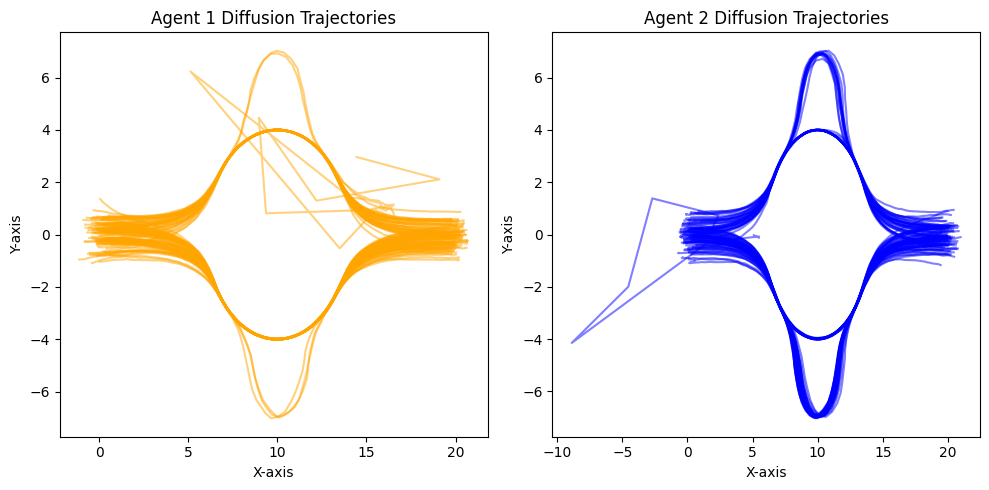

In [41]:
# Plotting diffusion trajectories

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Agent 1 Diffusion Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data1:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in ours1:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
# plt.scatter(x1, y1, color='red', label='First Trajectory')

plt.subplot(1, 2, 2)
plt.title("Agent 2 Diffusion Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data2:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in ours2:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='blue')
# plt.scatter(x2, y2, color='red', label='First Trajectory')

plt.tight_layout()

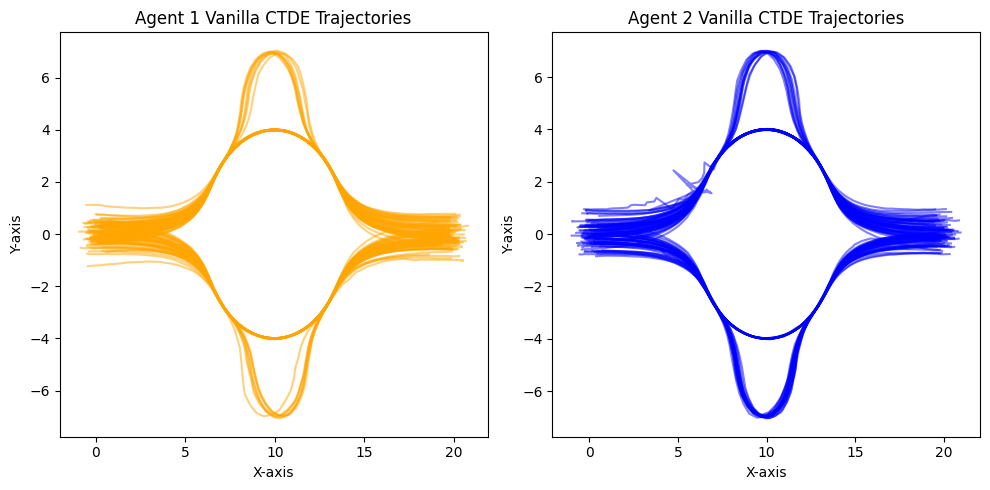

In [42]:
# Plotting vanilla CTDE trajectories

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
plt.title("Agent 1 Vanilla CTDE Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

for trajectory in vanilla1:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')

plt.subplot(1, 2, 2)
plt.title("Agent 2 Vanilla CTDE Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in vanilla2:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='blue')


plt.tight_layout()

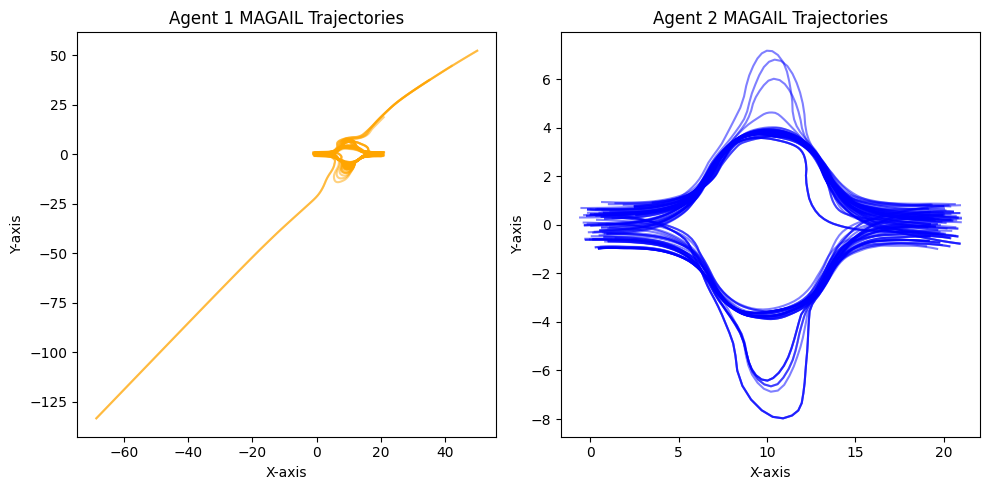

In [43]:
# Plotting magail trajectories

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Agent 1 MAGAIL Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data1:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in magail_vary_init1:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
# plt.scatter(x1, y1, color='red', label='First Trajectory')

plt.subplot(1, 2, 2)
plt.title("Agent 2 MAGAIL Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data2:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in magail_vary_init2:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='blue')
# plt.scatter(x2, y2, color='red', label='First Trajectory')

plt.tight_layout()

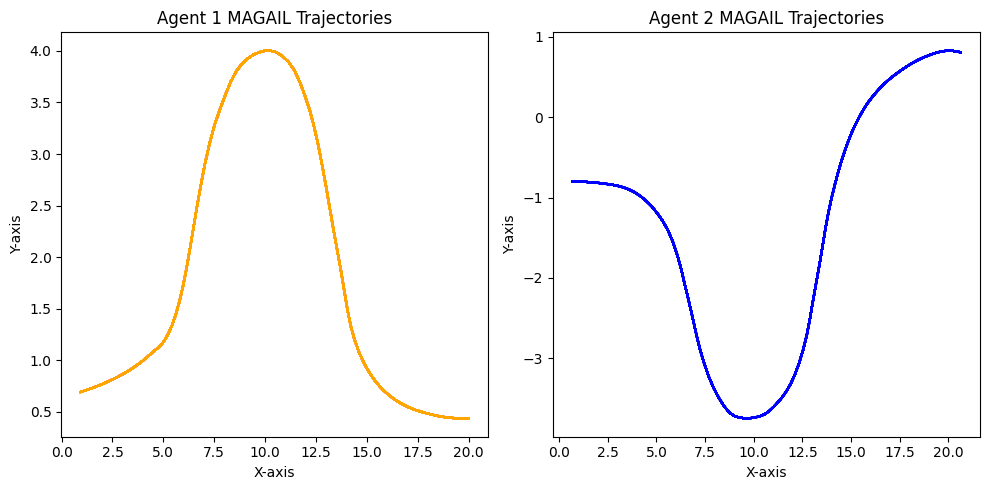

In [44]:
# Plotting magail trajectories

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Agent 1 MAGAIL Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data1:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in magail_static_init1:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
# plt.scatter(x1, y1, color='red', label='First Trajectory')

plt.subplot(1, 2, 2)
plt.title("Agent 2 MAGAIL Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data2:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in magail_static_init2:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='blue')
# plt.scatter(x2, y2, color='red', label='First Trajectory')

plt.tight_layout()

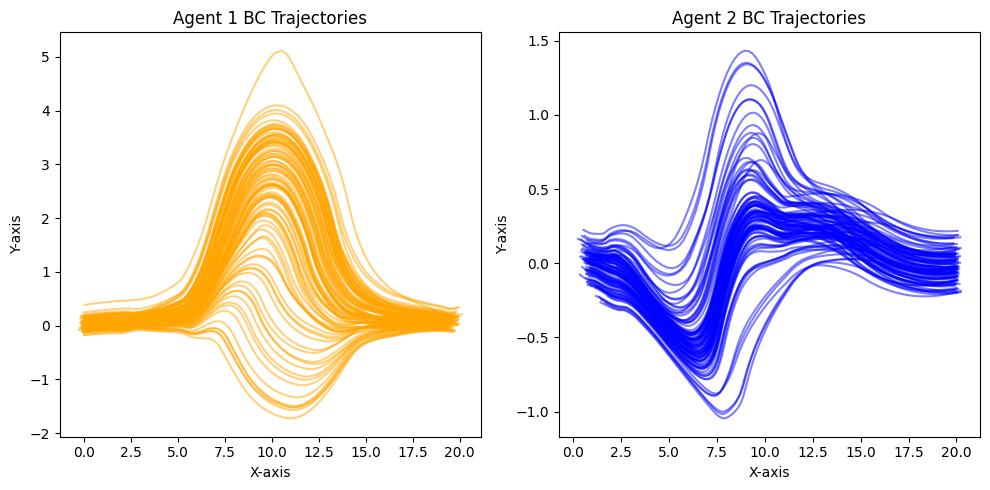

In [45]:
# Plotting bc trajectories

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Agent 1 BC Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data1:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in bc1:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
# plt.scatter(x1, y1, color='red', label='First Trajectory')

plt.subplot(1, 2, 2)
plt.title("Agent 2 BC Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data2:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in bc2:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='blue')
# plt.scatter(x2, y2, color='red', label='First Trajectory')

plt.tight_layout()

In [56]:
np.random.seed(30)  # for reproducibility (20, )
indices = np.random.choice(num_trajectories, size=n_traj, replace=False)
expert_data_rand1 = expert_data1[indices]
expert_data_rand2 = expert_data2[indices]

In [57]:
# compute frechet distance between the trajectories from expert and diffusion_gnn
fast_frechet = FastDiscreteFrechetMatrix(euclidean)

D_ours1 = np.zeros((n_traj,n_traj))
D_ours2 = np.zeros((n_traj,n_traj))

D_vanilla1 = np.zeros((n_traj,n_traj))
D_vanilla2 = np.zeros((n_traj,n_traj))

D_magail_vary_init1 = np.zeros((n_traj,n_traj))
D_magail_vary_init2 = np.zeros((n_traj,n_traj))

D_magail_static_init1 = np.zeros((n_traj,n_traj))
D_magail_static_init2 = np.zeros((n_traj,n_traj))

D_bc1 = np.zeros((n_traj,n_traj))
D_bc2 = np.zeros((n_traj,n_traj))

for i in range(n_traj):
    for j in range(n_traj):
        D_ours1[i,j] = fast_frechet.distance(expert_data_rand1[i], ours1[j])
        D_ours2[i,j] = fast_frechet.distance(expert_data_rand2[i], ours2[j])
        D_vanilla1[i,j] = fast_frechet.distance(expert_data_rand1[i], vanilla1[j])
        D_vanilla2[i,j] = fast_frechet.distance(expert_data_rand2[i], vanilla2[j])
        D_magail_vary_init1[i,j] = fast_frechet.distance(expert_data_rand1[i], magail_vary_init1[j])
        D_magail_vary_init2[i,j] = fast_frechet.distance(expert_data_rand2[i], magail_vary_init2[j])
        D_magail_static_init1[i,j] = fast_frechet.distance(expert_data_rand1[i], magail_static_init1[j])
        D_magail_static_init2[i,j] = fast_frechet.distance(expert_data_rand2[i], magail_static_init2[j])
        D_bc1[i,j] = fast_frechet.distance(expert_data_rand1[i], bc1[j])
        D_bc2[i,j] = fast_frechet.distance(expert_data_rand2[i], bc2[j])

w1 = np.ones(n_traj) / n_traj
w2 = np.ones(n_traj) / n_traj

# compute the optimal transport distance between the trajectories from expert and ours
ot_dist1 = ot.emd2(w1, w2, D_ours1)
ot_dist2 = ot.emd2(w1, w2, D_ours2)
print("Optimal Transport distance between expert and ours trajectories Agent-1: ", ot_dist1)
print("Optimal Transport distance between expert and ours trajectories Agent-2: ", ot_dist2)

# compute the optimal transport distance between the trajectories from expert and vanilla
ot_dist1 = ot.emd2(w1, w2, D_vanilla1)
ot_dist2 = ot.emd2(w1, w2, D_vanilla2)
print("Optimal Transport distance between expert and vanilla trajectories Agent-1: ", ot_dist1)
print("Optimal Transport distance between expert and vanilla trajectories Agent-2: ", ot_dist2)

# compute the optimal transport distance between the trajectories from expert and magail_vary_init
ot_dist1 = ot.emd2(w1, w2, D_magail_vary_init1)
ot_dist2 = ot.emd2(w1, w2, D_magail_vary_init2)
print("Optimal Transport distance between expert and magail_vary_init trajectories Agent-1: ", ot_dist1)
print("Optimal Transport distance between expert and magail_vary_init trajectories Agent-2: ", ot_dist2)

# compute the optimal transport distance between the trajectories from expert and magail_static_init
ot_dist1 = ot.emd2(w1, w2, D_magail_static_init1)
ot_dist2 = ot.emd2(w1, w2, D_magail_static_init2)
print("Optimal Transport distance between expert and magail_static_init trajectories Agent-1: ", ot_dist1)
print("Optimal Transport distance between expert and magail_static_init trajectories Agent-2: ", ot_dist2)

# compute the optimal transport distance between the trajectories from expert and bc
ot_dist1 = ot.emd2(w1, w2, D_bc1)
ot_dist2 = ot.emd2(w1, w2, D_bc2)
print("Optimal Transport distance between expert and bc trajectories Agent-1: ", ot_dist1)
print("Optimal Transport distance between expert and bc trajectories Agent-2: ", ot_dist2)

Optimal Transport distance between expert and ours trajectories Agent-1:  1.3318492200595005
Optimal Transport distance between expert and ours trajectories Agent-2:  1.7686089710476922
Optimal Transport distance between expert and vanilla trajectories Agent-1:  1.13309152574819
Optimal Transport distance between expert and vanilla trajectories Agent-2:  1.5881125455353646
Optimal Transport distance between expert and magail_vary_init trajectories Agent-1:  7.581445020255943
Optimal Transport distance between expert and magail_vary_init trajectories Agent-2:  1.7447277885409973
Optimal Transport distance between expert and magail_static_init trajectories Agent-1:  5.133497497921552
Optimal Transport distance between expert and magail_static_init trajectories Agent-2:  4.719509571460699
Optimal Transport distance between expert and bc trajectories Agent-1:  3.485976985525718
Optimal Transport distance between expert and bc trajectories Agent-2:  4.429222337184284


In [47]:
import numpy as np
import ot  # POT

# --- Helper: Fréchet cost matrix (rows=samples, cols=experts) ---
def frechet_cost_matrix(samples, experts, fast_frechet):
    """
    samples: (M, T, d)
    experts: (N, T, d)
    returns C: (M, N) where C[m, n] = Fréchet(samples[m], experts[n])
    """
    M, N = samples.shape[0], experts.shape[0]
    C = np.empty((M, N), dtype=np.float64)
    for m in range(M):
        sm = samples[m]
        for n in range(N):
            C[m, n] = fast_frechet.distance(sm, experts[n])
    return C

# --- Fréchet distance object (unchanged) ---
fast_frechet = FastDiscreteFrechetMatrix(euclidean)

# ============= Agent 1 =============
# Build full cost matrices (samples vs ALL experts)
C_ours1  = frechet_cost_matrix(ours1,  expert_data1, fast_frechet)
C_van1   = frechet_cost_matrix(vanilla1, expert_data1, fast_frechet)
C_mv1    = frechet_cost_matrix(magail_vary_init1,  expert_data1, fast_frechet)
C_ms1    = frechet_cost_matrix(magail_static_init1, expert_data1, fast_frechet)
C_bc1    = frechet_cost_matrix(bc1, expert_data1, fast_frechet)

# Uniform weights with lengths matching each side
a_ours1 = np.full(C_ours1.shape[0], 1.0 / C_ours1.shape[0])
b_1     = np.full(C_ours1.shape[1], 1.0 / C_ours1.shape[1])

print("Optimal Transport distance (Agent-1) vs expert:")
print("  ours:           ", ot.emd2(a_ours1, b_1, C_ours1))
print("  vanilla:        ", ot.emd2(np.full(C_van1.shape[0], 1.0/C_van1.shape[0]), b_1, C_van1))
print("  magail_vary:    ", ot.emd2(np.full(C_mv1.shape[0],  1.0/C_mv1.shape[0]),  b_1, C_mv1))
print("  magail_static:  ", ot.emd2(np.full(C_ms1.shape[0],  1.0/C_ms1.shape[0]),  b_1, C_ms1))
print("  bc:             ", ot.emd2(np.full(C_bc1.shape[0],  1.0/C_bc1.shape[0]),  b_1, C_bc1))

# ============= Agent 2 =============
C_ours2  = frechet_cost_matrix(ours2,  expert_data2, fast_frechet)
C_van2   = frechet_cost_matrix(vanilla2, expert_data2, fast_frechet)
C_mv2    = frechet_cost_matrix(magail_vary_init2,  expert_data2, fast_frechet)
C_ms2    = frechet_cost_matrix(magail_static_init2, expert_data2, fast_frechet)
C_bc2    = frechet_cost_matrix(bc2, expert_data2, fast_frechet)

a_ours2 = np.full(C_ours2.shape[0], 1.0 / C_ours2.shape[0])
b_2     = np.full(C_ours2.shape[1], 1.0 / C_ours2.shape[1])

print("Optimal Transport distance (Agent-2) vs expert:")
print("  ours:           ", ot.emd2(a_ours2, b_2, C_ours2))
print("  vanilla:        ", ot.emd2(np.full(C_van2.shape[0], 1.0/C_van2.shape[0]), b_2, C_van2))
print("  magail_vary:    ", ot.emd2(np.full(C_mv2.shape[0],  1.0/C_mv2.shape[0]),  b_2, C_mv2))
print("  magail_static:  ", ot.emd2(np.full(C_ms2.shape[0],  1.0/C_ms2.shape[0]),  b_2, C_ms2))
print("  bc:             ", ot.emd2(np.full(C_bc2.shape[0],  1.0/C_bc2.shape[0]),  b_2, C_bc2))


Optimal Transport distance (Agent-1) vs expert:
  ours:            1.585309833397627
  vanilla:         0.9508207499288278
  magail_vary:     7.620802763938002
  magail_static:   4.99946526736924
  bc:              3.452046423546029
Optimal Transport distance (Agent-2) vs expert:
  ours:            1.9607148765017128
  vanilla:         1.2890373136467825
  magail_vary:     1.5047760097539369
  magail_static:   4.983550078989753
  bc:              4.426244994969505
